In [1]:
# author: Fahim Tajwar
from label_loader import *
from image_loader import *
from util import *
from models import *
from model_trainer import *
from dataset import *

file_name_1 = '../data/labels_cells_only.xlsx'
file_name_2 = '../data/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

set(['cell dies', 'grows sparse'])
{'cell dies': 0, 'grows sparse': 1}
tensor([0.0130, 0.0049])


In [2]:
prefix = "../data/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
si = Single_Image_Loader(5, all_well_ids, prefix, suffix)
tensor = si.get_image_tensor()
well_id_to_image_id_map = si.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([283, 3, 224, 224])
{68: 266, 1027: 6, 358: 228, 518: 244, 522: 246, 1879: 93, 1036: 7, 1037: 8, 14: 204, 17: 209, 2578: 168, 2579: 169, 1046: 9, 536: 248, 2991: 196, 29: 222, 1055: 10, 2082: 123, 1060: 11, 1062: 12, 1063: 13, 1064: 14, 42: 238, 2091: 124, 564: 251, 2096: 125, 561: 250, 2099: 126, 52: 245, 2101: 127, 1078: 15, 2484: 165, 2107: 128, 572: 253, 2111: 129, 1600: 46, 2625: 170, 2114: 130, 331: 225, 667: 263, 2389: 156, 1607: 47, 1608: 48, 1098: 16, 1611: 49, 1100: 17, 98: 282, 1614: 50, 525: 247, 755: 276, 1622: 51, 1111: 18, 2137: 133, 91: 280, 101: 198, 608: 258, 1122: 19, 2147: 134, 100: 197, 2135: 132, 2662: 171, 1130: 20, 1134: 21, 111: 199, 2920: 189, 703: 270, 275: 219, 1141: 22, 1142: 23, 614: 259, 121: 200, 1146: 24, 2751: 175, 2684: 173, 2666: 172, 128: 201, 1153: 25, 1667: 52, 2693: 174, 134: 202, 1672: 53, 1815: 78, 653: 262, 1679: 54, 2193: 136, 2194: 137, 451: 241, 1685: 55, 1175: 26, 1176: 27, 1689: 56, 623: 260, 159: 206, 2839: 179, 2210: 138, 118

In [3]:
input_size = 3 * 224 * 224
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

{68: 0, 1027: 1, 358: 1, 518: 1, 522: 1, 1879: 1, 1036: 1, 1037: 1, 14: 1, 17: 0, 2578: 1, 2579: 0, 1046: 1, 536: 1, 2991: 1, 29: 1, 1055: 0, 2082: 1, 1060: 0, 1062: 1, 1063: 0, 1064: 0, 42: 0, 2091: 1, 564: 1, 2096: 0, 561: 1, 2099: 0, 52: 1, 2101: 1, 1078: 1, 2484: 1, 2107: 0, 572: 1, 2111: 1, 1600: 0, 2625: 0, 2114: 1, 331: 1, 667: 0, 2389: 1, 1607: 1, 1608: 1, 1098: 0, 1611: 1, 1100: 1, 98: 1, 1614: 0, 525: 0, 755: 0, 1622: 1, 1111: 1, 2137: 1, 91: 1, 101: 1, 608: 1, 1122: 1, 2147: 0, 100: 0, 2135: 1, 2662: 0, 1130: 0, 1134: 1, 111: 1, 2920: 1, 703: 0, 275: 1, 1141: 1, 1142: 0, 614: 0, 121: 0, 1146: 0, 2751: 1, 2684: 1, 2666: 1, 128: 1, 1153: 1, 1667: 1, 2693: 1, 134: 1, 1672: 0, 1815: 1, 653: 1, 1679: 1, 2193: 1, 2194: 1, 451: 1, 1685: 1, 1175: 1, 1176: 1, 1689: 0, 623: 1, 159: 1, 2839: 1, 2210: 1, 1187: 1, 677: 0, 2215: 1, 169: 1, 683: 1, 2955: 1, 76: 0, 1714: 0, 2227: 1, 2231: 0, 1719: 1, 696: 1, 187: 1, 702: 0, 2239: 1, 1733: 1, 2337: 1, 1736: 1, 2249: 1, 202: 1, 1739: 0, 2543:

In [4]:
training_set = Augmented_Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map, 
                                 None)
validation_set = Augmented_Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map, None)
test_set = Augmented_Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map, None)

In [5]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.0005

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [6]:
conv_net_1 = Our2DConvNetDesign1(num_classes = 2)
model_1 = Model(conv_net_1, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 30, verbose = True)

Epoch: [1/30], Loss: 0.7276
Epoch: [2/30], Loss: 0.7089
Epoch: [3/30], Loss: 0.6933
Epoch: [4/30], Loss: 0.6800
Epoch: [5/30], Loss: 0.6685
Epoch: [6/30], Loss: 0.6584
Epoch: [7/30], Loss: 0.6493
Epoch: [8/30], Loss: 0.6412
Epoch: [9/30], Loss: 0.6337
Epoch: [10/30], Loss: 0.6268
Epoch: [11/30], Loss: 0.6203
Epoch: [12/30], Loss: 0.6142
Epoch: [13/30], Loss: 0.6084
Epoch: [14/30], Loss: 0.6029
Epoch: [15/30], Loss: 0.5976
Epoch: [16/30], Loss: 0.5924
Epoch: [17/30], Loss: 0.5875
Epoch: [18/30], Loss: 0.5827
Epoch: [19/30], Loss: 0.5779
Epoch: [20/30], Loss: 0.5733
Epoch: [21/30], Loss: 0.5688
Epoch: [22/30], Loss: 0.5644
Epoch: [23/30], Loss: 0.5601
Epoch: [24/30], Loss: 0.5558
Epoch: [25/30], Loss: 0.5517
Epoch: [26/30], Loss: 0.5476
Epoch: [27/30], Loss: 0.5437
Epoch: [28/30], Loss: 0.5398
Epoch: [29/30], Loss: 0.5360
Epoch: [30/30], Loss: 0.5324
Training done!


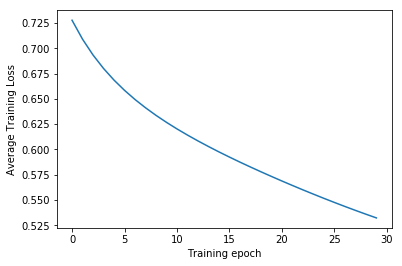

accuracy : 76.000000

('Frequency per class: ', {'cell dies': 62, 'grows sparse': 164})


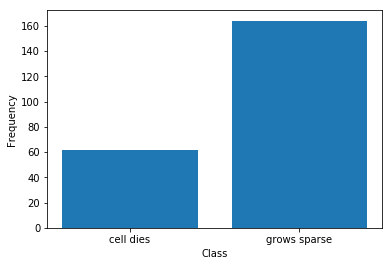

('Number of datapoints we got correct per class', {'cell dies': 52, 'grows sparse': 122})
('Accuracy per class', {'cell dies': 0.8387096774193549, 'grows sparse': 0.7439024390243902})


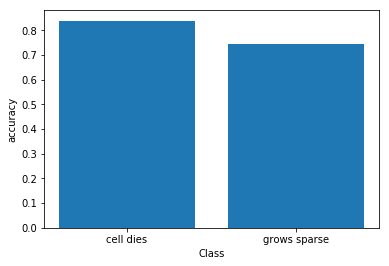

0.6239181746656176

In [7]:
model_1.train()

accuracy : 85.000000

('Frequency per class: ', {'cell dies': 8, 'grows sparse': 20})


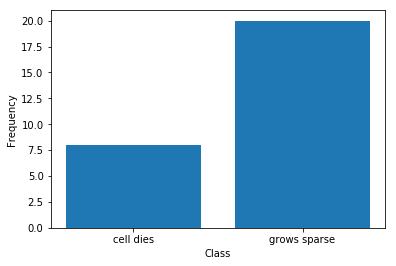

('Number of datapoints we got correct per class', {'cell dies': 8, 'grows sparse': 16})
('Accuracy per class', {'cell dies': 1.0, 'grows sparse': 0.8})


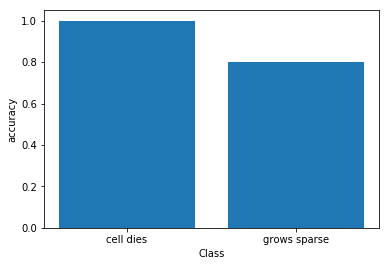

0.8

In [8]:
model_1.test(validation_loader)

accuracy : 78.000000

('Frequency per class: ', {'cell dies': 6, 'grows sparse': 22})


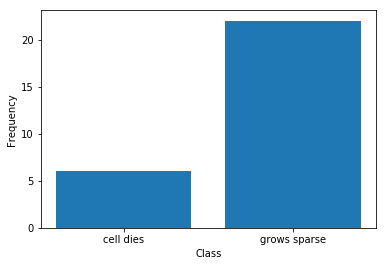

('Number of datapoints we got correct per class', {'cell dies': 4, 'grows sparse': 18})
('Accuracy per class', {'cell dies': 0.6666666666666666, 'grows sparse': 0.8181818181818182})


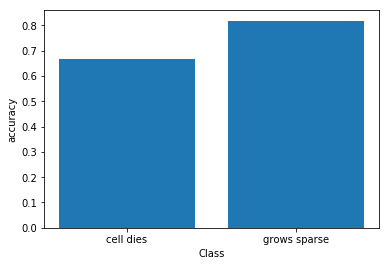

0.5454545454545454

In [9]:
model_1.test(test_loader)